# Modern Data Analytics [G0Z39a]

## Project: Covid 19 in the USA

### Load packages

In [5]:
import mda_module_005 as mda

import os
import pandas as pd
import numpy as np


import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

import plotly.offline as py
py.init_notebook_mode(connected=True)
pio.renderers.default = 'plotly_mimetype'
  
import matplotlib.pyplot as plt

import datetime as dt

import ipywidgets as widgets
from IPython.display import display

from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Load data

In [6]:
cwd = os.getcwd()

In [7]:
cwd

'C:\\Users\\35799\\Desktop\\KU Leuven\\Semester 2\\Modern Data Analytics\\project'

In [8]:
us = pd.read_csv(cwd+"/covid-19-data/us.csv")
counties_df = pd.read_csv(cwd+"/covid-19-data/us-counties.csv")
states_df = pd.read_csv(cwd+"/covid-19-data/us-states.csv")
counties20 = pd.read_csv(cwd+"/covid-19-data/us-counties-2020.csv")
counties21 = pd.read_csv(cwd+"/covid-19-data/us-counties-2021.csv")
counties22 = pd.read_csv(cwd+"/covid-19-data/us-counties-2022.csv")
extra_data = pd.read_csv(cwd+"/data/extra_data.csv")

### Data Pre-Processing

#### County Data

In [5]:
counties20_clean = mda.counties_preprocessing(counties20)
counties21_clean = mda.counties_preprocessing(counties21)
counties22_clean = mda.counties_preprocessing(counties22)

In [6]:
counties20_clean.head()

,date,year,month,day,state,code,county,cases,deaths
0,2020-01-21,2020,01,21,Washington,WA,Snohomish,1,0
1,2020-01-22,2020,01,22,Washington,WA,Snohomish,1,0
2,2020-01-23,2020,01,23,Washington,WA,Snohomish,1,0
3,2020-01-24,2020,01,24,Illinois,IL,Cook,1,0
4,2020-01-24,2020,01,24,Washington,WA,Snohomish,1,0


In [7]:
counties21_clean.head()

,date,year,month,day,state,code,county,cases,deaths
0,2021-01-01,2021,01,01,Alabama,AL,Autauga,4239,50
1,2021-01-01,2021,01,01,Alabama,AL,Baldwin,13823,169
2,2021-01-01,2021,01,01,Alabama,AL,Barbour,1517,33
3,2021-01-01,2021,01,01,Alabama,AL,Bibb,1854,46
4,2021-01-01,2021,01,01,Alabama,AL,Blount,4693,63


In [8]:
counties22_clean.head()

,date,year,month,day,state,code,county,cases,deaths
0,2022-01-01,2022,01,01,Alabama,AL,Autauga,11018,160
1,2022-01-01,2022,01,01,Alabama,AL,Baldwin,39911,593
2,2022-01-01,2022,01,01,Alabama,AL,Barbour,3860,81
3,2022-01-01,2022,01,01,Alabama,AL,Bibb,4533,95
4,2022-01-01,2022,01,01,Alabama,AL,Blount,11256,198


### Map

In [9]:
mapdf = mda.extra_data_retriever(extra_data, mda.state_per_month(states_df))

In [10]:
mapdf.head()

,date,state,code,latitude,longitude,cases,deaths,1_dose,complete_dose
0,2020-01,Arizona,AZ,34.168219,-111.930907,1,0,0,0
1,2020-01,California,CA,37.271875,-119.270415,3,0,0,0
2,2020-01,Illinois,IL,39.739318,-89.504139,2,0,0,0
3,2020-01,Washington,WA,38.899349,-77.014567,1,0,0,0
13,2020-02,Wisconsin,WI,44.786297,-89.826705,1,0,0,0


In [11]:
def fig_creator(s):
    import plotly.express as px
    
    fig = px.scatter_geo(mapdf, locations="code", locationmode="USA-states", hover_name="state",
                     hover_data=["cases", "deaths", "1_dose", "complete_dose"], size=s, size_max=20,
                     animation_frame="date", projection="albers usa", title="Covid-19 evolution in US per state", width=1000, height=1000)
    fig.show()

In [12]:
widgets.interact(fig_creator, s=widgets.Dropdown(
    options=[("Cases", "cases"), ("Deaths", "deaths"), ("One Vaccination Dose", "1_dose"), ("Complete Vaccination", "complete_dose")],
    description='Select:'
));

interactive(children=(Dropdown(description='Select:', options=(('Cases', 'cases'), ('Deaths', 'deaths'), ('One…

### Time Series plot

In [13]:
us_timeseries = mda.timeseries_process(us, "us")
state_timeseries = mda.timeseries_process(states_df, "state")
counties = pd.concat([counties20_clean, counties21_clean, counties22_clean])
counties_timeseries = mda.timeseries_process(counties, "county")

In [14]:
dropdown_case = widgets.Dropdown(options=[("Daily Cases", 'daily_cases'), ("Daily Deaths", 'daily_deaths')])
dropdown_level = widgets.Dropdown(options=[('USA','us'),('State','state'), ('County','county')])
dropdown_state = widgets.Dropdown(options=state_timeseries['state'].unique())
dropdown_county = widgets.Dropdown(options=counties_timeseries['county'].unique())
input_widgets = widgets.HBox([dropdown_case, dropdown_level])

output = widgets.Output()
def com_filter(case, level, state, county):
    output.clear_output()
    if level == 'us':
        with output:
            mda.plot(us_timeseries, level="us", y=case)
    elif level == "state":
        with output:
            display(dropdown_state)
            mda.plot(state_timeseries, level="state", y=case, state=state)
    elif level == "county":
        with output:
            display(dropdown_county)
            mda.plot(counties_timeseries, level="county", y=case, county=county)

def dropdown_case_eventhandler(change):
    com_filter(change.new, dropdown_level.value, dropdown_state.value, dropdown_county.value)

def dropdown_level_eventhandler(change):
    com_filter(dropdown_case.value, change.new, dropdown_state.value, dropdown_county.value)    
    
def dropdown_state_eventhandler(change):
    com_filter(dropdown_case.value, dropdown_level.value, change.new, dropdown_county.value)
    
def dropdown_county_eventhandler(change):
    com_filter(dropdown_case.value, dropdown_level.value, dropdown_state.value, change.new)
    
dropdown_case.observe(dropdown_case_eventhandler, names='value')
dropdown_level.observe(dropdown_level_eventhandler, names='value')
dropdown_state.observe(dropdown_state_eventhandler, names='value')
dropdown_county.observe(dropdown_county_eventhandler, names='value')
display(input_widgets)


display(output)

Output()

### Clustering

In [15]:
df = mapdf.copy(deep=True)

In [16]:
df20_processed, df21_processed, df22_processed = mda.cluster_process(df)

#### 2020

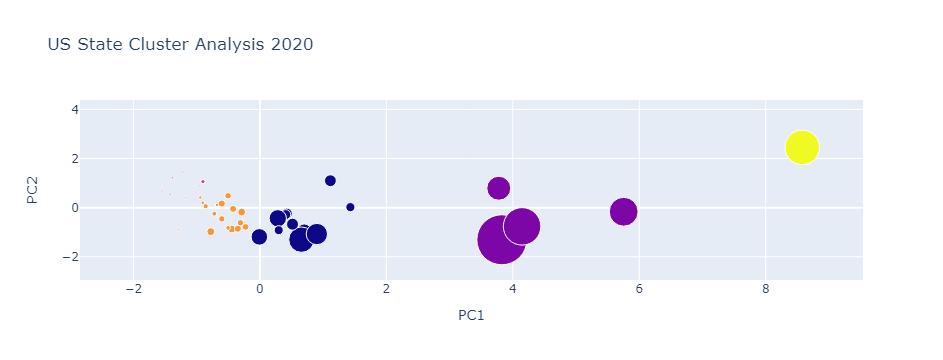

In [17]:
warnings.filterwarnings('ignore')

clusterdf20, Z20, silhoutte20, ari20 = mda.cluster_algorithm(df20_processed, "kmeans")

fig20 = go.Figure(
    data=go.Scatter(
        x=clusterdf20["PC1"].values,
        y=clusterdf20["PC2"].values,
        text=clusterdf20.index,
        mode='markers',
        marker=go.Marker(
            size=df20_processed["deaths"],
            sizemode='diameter',
            sizeref=df20_processed["deaths"].max()/50,
            opacity=1,
            color=Z20
        )
    )
)

fig20.update_layout(
    go.Layout(
        title='US State Cluster Analysis 2020',
        xaxis=go.XAxis(title="PC1", showgrid=True, zeroline=True, showticklabels=True),
        yaxis=go.YAxis(title="PC2", showgrid=True, zeroline=True, showticklabels=True),
        hovermode='closest'
    )
)

fig20.show()

#### 2021

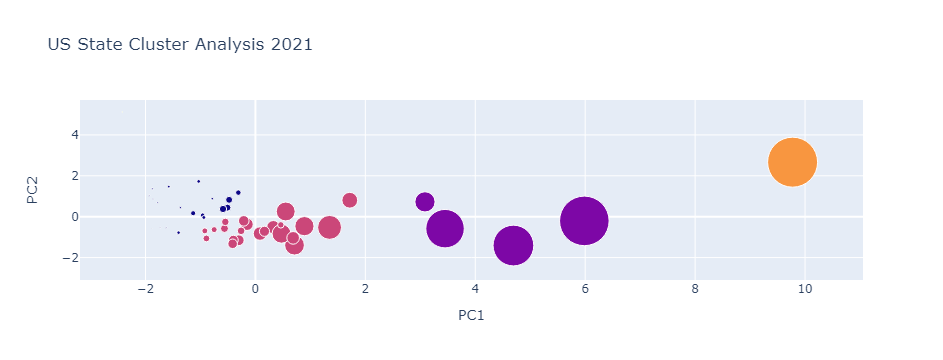

In [18]:
warnings.filterwarnings('ignore')

clusterdf21, Z21, silhoutte21, ari21 = mda.cluster_algorithm(df21_processed, "kmeans")

fig21 = go.Figure(
    data=go.Scatter(
        x=clusterdf21["PC1"].values,
        y=clusterdf21["PC2"].values,
        text=clusterdf21.index,
        mode='markers',
        marker=go.Marker(
            size=df21_processed["deaths"],
            sizemode='diameter',
            sizeref=df21_processed["deaths"].max()/50,
            opacity=1,
            color=Z21
        )
    )
)

fig21.update_layout(
    go.Layout(
        title='US State Cluster Analysis 2021',
        xaxis=go.XAxis(title="PC1", showgrid=True, zeroline=True, showticklabels=True),
        yaxis=go.YAxis(title="PC2", showgrid=True, zeroline=True, showticklabels=True),
        hovermode='closest'
    )
)

fig21.show()

#### 2022

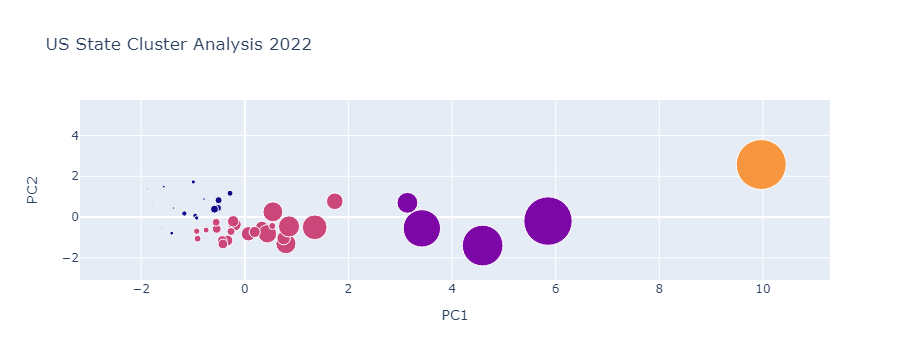

In [19]:
warnings.filterwarnings('ignore')

clusterdf22, Z22, silhoutte22, ari22 = mda.cluster_algorithm(df22_processed, "kmeans")

fig22 = go.Figure(
    data=go.Scatter(
        x=clusterdf22["PC1"].values,
        y=clusterdf22["PC2"].values,
        text=clusterdf22.index,
        mode='markers',
        marker=go.Marker(
            size=df22_processed["deaths"],
            sizemode='diameter',
            sizeref=df22_processed["deaths"].max()/50,
            opacity=1,
            color=Z22
        )
    )
)

fig22.update_layout(
    go.Layout(
        title='US State Cluster Analysis 2022',
        xaxis=go.XAxis(title="PC1", showgrid=True, zeroline=True, showticklabels=True),
        yaxis=go.YAxis(title="PC2", showgrid=True, zeroline=True, showticklabels=True),
        hovermode='closest'
    )
)

fig22.show()

### Linear Mixed Effects Models

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
lmem = mda.lmem_process(mapdf)

In [22]:
lmem

,state,month,year,latitude,longitude,cases,deaths,1_dose,complete_dose,population
0,Alabama,3,2020,32.601011,-86.680736,999,14,0,0,4903185
1,Alabama,4,2020,32.601011,-86.680736,7068,272,0,0,4903185
2,Alabama,5,2020,32.601011,-86.680736,17952,630,0,0,4903185
3,Alabama,6,2020,32.601011,-86.680736,38045,950,0,0,4903185
4,Alabama,7,2020,32.601011,-86.680736,87723,1580,0,0,4903185
...,...,...,...,...,...,...,...,...,...,...
240,Wyoming,25,2022,43.000325,-107.554567,146505,1625,62640,54351,578759
241,Wyoming,26,2022,43.000325,-107.554567,155101,1718,63254,55093,578759
242,Wyoming,27,2022,43.000325,-107.554567,156112,1791,63619,55498,578759
243,Wyoming,28,2022,43.000325,-107.554567,156550,1812,64139,56324,578759


In [23]:
# Run LMER
md = smf.mixedlm("deaths ~ month", lmem, groups=lmem["state"], re_formula="~month")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     deaths      
No. Observations:      1347        Method:                 REML        
No. Groups:            50          Scale:                  2906593.0676
Min. group size:       10          Log-Likelihood:         -12191.0517 
Max. group size:       29          Converged:              Yes         
Mean group size:       26.9                                            
-----------------------------------------------------------------------
                     Coef.     Std.Err.   z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
Intercept            -2149.895  621.497 -3.459 0.001 -3368.007 -931.782
month                  783.519  121.739  6.436 0.000   544.916 1022.123
Group Var         18739953.564 2329.512                                
Group x month Cov -2081952.931  365.908                                
month Var

### Generalized Linear Models

In [24]:
poissondf = lmem.copy(deep=True)

In [25]:
poissondf = poissondf[poissondf["year"]==2021]

#### Poisson Regression 1

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder

In [27]:
poissondf2 = poissondf.copy(deep=True)
encoder = OrdinalEncoder()
poissondf2["states"] = encoder.fit_transform(poissondf2[["state"]])
poissondf2 = poissondf2.drop(["year", "latitude", "longitude", "state"], axis=1)
poissondf2["month"]-=12
poissondf2.head()

,month,cases,deaths,1_dose,complete_dose,population,states
0,1,459639,7688,44695,10398,4903185,0.0
1,2,493252,9930,83793,42684,4903185,0.0
2,3,515388,10554,164347,88181,4903185,0.0
3,4,527922,10896,228962,167594,4903185,0.0
4,5,543405,11146,256387,206749,4903185,0.0


In [28]:
response = poissondf2["deaths"].values
regressors = poissondf2[["states", "month", "population", "cases", "1_dose", "complete_dose"]].values
# regressors = poissondf2[["month", "state_category"]]
n = poissondf2["population"].values

In [29]:
poisson_model = sm.GLM(endog=response, exog=regressors, offset=n, family=sm.families.Poisson())

In [30]:
poisson_results = poisson_model.fit()

In [31]:
poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  588
Model:                            GLM   Df Residuals:                      582
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0926e+07
Date:                Tue, 31 May 2022   Deviance:                   2.1845e+07
Time:                        17:37:29   Pearson chi2:                 2.86e+08
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0435   3.95e-05   1099.329      0.000       0.043       0.044
x2             0.7390      0.000   5182.176      0.000       0.739       0.739
x3            -1.0000   1.22e-10  -8.18e+09      0.000      -1.000      -1.000
x4         -2.335e-06   1.04e-09  -2236.376      0.000   -2.34e-06   -2.33e-06
x5          1.265e-06   2.25e-09    562.799      0.000    1.26e-06    1.27e-06
x6         -1.784e-06   2.49e-09   -715.919      0.000   -1.79e-06   -1.78e-06
==============================================================================
"""

#### Poisson Regression 2

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import poisson
from statsmodels.formula.api import negativebinomial
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
poissondf3 = poissondf.drop(["year", "latitude", "longitude"], axis=1)
poissondf3["month"]-=12
poissondf3["month"] = poissondf3["month"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
poissondf3.head()

,state,month,cases,deaths,1_dose,complete_dose,population
0,Alabama,January,459639,7688,44695,10398,4903185
1,Alabama,February,493252,9930,83793,42684,4903185
2,Alabama,March,515388,10554,164347,88181,4903185
3,Alabama,April,527922,10896,228962,167594,4903185
4,Alabama,May,543405,11146,256387,206749,4903185


In [34]:
model1 = poisson('deaths ~ state+month', data=poissondf3).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 39.663045
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                 deaths   No. Observations:                  588
Model:                        Poisson   Df Residuals:                      528
Method:                           MLE   Df Model:                           59
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.9940
Time:                        17:37:48   Log-Likelihood:                -23322.
converged:                       True   LL-Null:                   -3.8701e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   9.3261      0.003   3221.508      0.000       9.320       9.332
state[T.Alaska]            -3.2472      0.013   -241.539      0.000      -3.274      -3.221
state[T.Arizona]            0.4141      0.003    123.530      0.000       0.407       0.421
state[T.Arkansas]          -0.6097      0.004   -139.105      0.000      -0.618      -0.601
state[T.California]         1.6427      0.003    578.143      0.000       1.637       1.648
state[T.Colorado]          -0.5140      0.004   -120.898      0.000      -0.522      -0.506
state[T.Connecticut]       -0.3982      0.004    -97.032      0.000      -0.406      -0.390
state[T.Delaware]          -1.9386      0.007   -264.372      0.000      -1.953      -1.924
state[T.Florida]            1.2634      0.003    428.901      0.000       1.258       1.269
state[T.Georgia]            0.5852      0.003    180.307      0.000       0.579       0.592
state[T.Idaho]             -1.5637      0.006   -250.151      0.000      -1.576      -1.551
state[T.Illinois]           0.7464      0.003    236.377      0.000       0.740       0.753
state[T.Indiana]            0.1619      0.004     45.773      0.000       0.155       0.169
state[T.Iowa]              -0.6726      0.004   -150.334      0.000      -0.681      -0.664
state[T.Kansas]            -0.8079      0.005   -172.489      0.000      -0.817      -0.799
state[T.Kentucky]          -0.4652      0.004   -111.085      0.000      -0.473      -0.457
state[T.Louisiana]         -0.0406      0.004    -10.933      0.000      -0.048      -0.033
state[T.Maine]             -2.5643      0.010   -263.584      0.000      -2.583      -2.545
state[T.Maryland]          -0.2466      0.004    -62.801      0.000      -0.254      -0.239
state[T.Massachusetts]      0.3745      0.003    110.838      0.000       0.368       0.381
state[T.Michigan]           0.5344      0.003    163.136      0.000       0.528       0.541
state[T.Minnesota]         -0.4415      0.004   -106.202      0.000      -0.450      -0.433
state[T.Mississippi]       -0.4106      0.004    -99.697      0.000      -0.419      -0.403
state[T.Missouri]          -0.1157      0.004    -30.532      0.000      -0.123      -0.108
state[T.Montana]           -1.8907      0.007   -263.278      0.000      -1.905      -1.877
state[T.Nebraska]          -1.5502      0.006   -249.381      0.000      -1.562      -1.538
state[T.Nevada]            -0.6806      0.004   -151.716      0.000      -0.689      -0.672
state[T.New Hampshire]     -2.1617      0.008   -267.060      0.000      -2.178      -2.146
state[T.New Jersey]         0.7527      0.003    238.594      0.000       0.746       0.759
state[T.New Mexico]        -1.0140      0.005   -201.151      0.000      -1.024      -1.004
state[T.New York]           1.4525      0.003    502.726      0.000       1.447       1.458
state[T.North Carolina]     0.1568      0.004     44.266      0.000       0.150       0.164
state[T.North Dakota]

#### sklearn

In [35]:
poissondf4 = lmem.copy(deep=True)
poissondf4 = poissondf[poissondf["year"]==2021]

In [36]:
poissondf4["month"]-=12
poissondf4.head()

,state,month,year,latitude,longitude,cases,deaths,1_dose,complete_dose,population
0,Alabama,1,2021,32.601011,-86.680736,459639,7688,44695,10398,4903185
1,Alabama,2,2021,32.601011,-86.680736,493252,9930,83793,42684,4903185
2,Alabama,3,2021,32.601011,-86.680736,515388,10554,164347,88181,4903185
3,Alabama,4,2021,32.601011,-86.680736,527922,10896,228962,167594,4903185
4,Alabama,5,2021,32.601011,-86.680736,543405,11146,256387,206749,4903185


In [37]:
poissondf4.describe()

,month,year,latitude,longitude,cases,deaths,1_dose,complete_dose,population
count,588.000000,588.0,588.000000,588.000000,5.880000e+02,588.000000,5.880000e+02,5.880000e+02,5.880000e+02
mean,6.500000,2021.0,39.702580,-91.800800,7.615121e+05,12802.654762,6.261514e+05,5.144728e+05,6.655467e+06
std,3.454992,0.0,5.506047,17.075432,8.677603e+05,14846.546181,9.816716e+05,8.328003e+05,7.358295e+06
min,1.000000,2021.0,27.975728,-158.775020,1.196500e+04,174.000000,0.000000e+00,0.000000e+00,5.787590e+05
25%,3.750000,2021.0,35.830521,-100.247164,2.078955e+05,2786.500000,1.220698e+05,8.464775e+04,1.934408e+06
50%,6.500000,2021.0,39.499761,-89.504139,5.027495e+05,7857.000000,3.261940e+05,2.688985e+05,4.648794e+06
75%,9.250000,2021.0,43.000325,-79.458786,9.185150e+05,16281.000000,6.818120e+05,5.833655e+05,7.614893e+06
max,12.000000,2021.0,61.302501,-69.014866,5.515613e+06,76709.000000,7.833520e+06,6.757813e+06,3.951222e+07


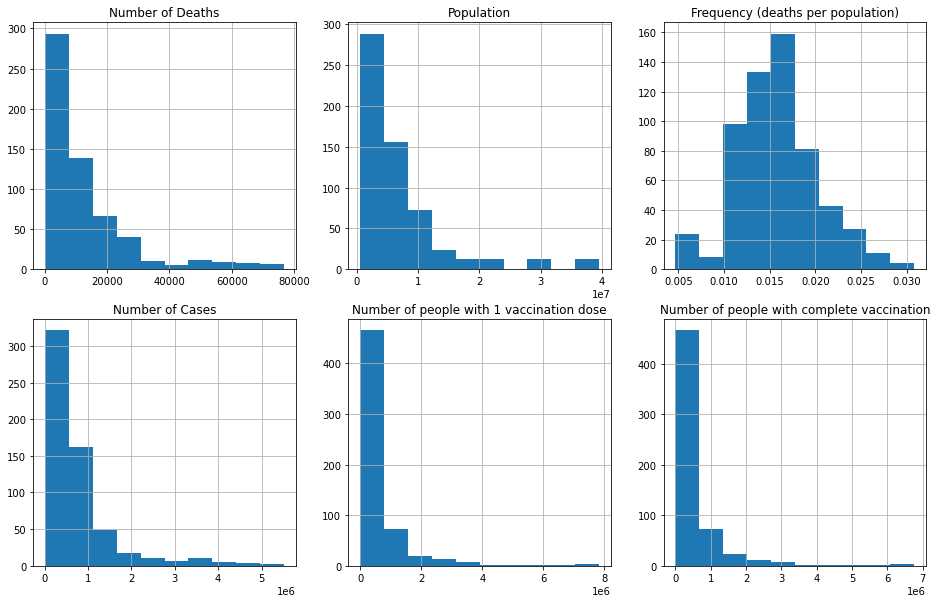

In [39]:
poissondf4["deathFrequency"] = poissondf4["deaths"] / poissondf4["cases"]

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
ax0.set_title("Number of Deaths")
_ = poissondf4["deaths"].hist(ax=ax0)
ax1.set_title("Population")
_ = poissondf4["population"].hist(ax=ax1)
ax2.set_title("Frequency (deaths per population)")
_ = poissondf4["deathFrequency"].hist(ax=ax2)
ax3.set_title("Number of Cases")
_ = poissondf4["cases"].hist(ax=ax3)
ax4.set_title("Number of people with 1 vaccination dose")
_ = poissondf4["1_dose"].hist(ax=ax4)
ax5.set_title("Number of people with complete vaccination")
_ = poissondf4["complete_dose"].hist(ax=ax5)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor

In [42]:
preprocessor = ColumnTransformer(
        [
            ("drop_columns", "drop", ["year", "latitude", "longitude", "deaths", "population", "cases"]),
            ("categorize_variables", OrdinalEncoder(), ["state", "month"]),
            ("bin_variables", KBinsDiscretizer(n_bins=10), ["1_dose", "complete_dose"])
        ], remainder="passthrough"
)

poisson_glm = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", PoissonRegressor(alpha=1, max_iter=100)),
    ]
)

In [43]:
X = poissondf4.drop(columns=['deathFrequency'])
y = poissondf4[['deathFrequency']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0)

In [45]:
poisson_glm.fit(X_train, y_train, regressor__sample_weight=X_train["cases"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['year', 'latitude',
                                                   'longitude', 'deaths',
                                                   'population', 'cases']),
                                                 ('categorize_variables',
                                                  OrdinalEncoder(),
                                                  ['state', 'month']),
                                                 ('bin_variables',
                                                  KBinsDiscretizer(n_bins=10),
                                                  ['1_dose',
                                                   'complete_dose'])])),
                ('regressor', PoissonRegressor(alpha=1))])

In [46]:
poisson_glm[1].coef_

array([-7.95991774e-04, -2.80933281e-03, -1.18685705e-05, -7.78572489e-06,
        9.47245066e-05,  2.57325526e-05,  4.42722108e-05, -3.22879856e-05,
       -2.46478181e-04,  5.44605451e-05,  1.79239440e-04, -6.96794848e-05,
       -4.03771352e-05,  8.50272618e-05,  5.17465642e-05,  4.59248830e-05,
        3.83321814e-05,  3.93824788e-06, -1.84979893e-04, -3.85510595e-05,
        1.02996701e-04, -3.37284437e-05])

In [47]:
poisson_glm[1].intercept_

-4.061182909914911

In [48]:
poisson_glm[1].n_iter_

9

In [49]:
poisson_glm[1].n_features_in_

22

In [50]:
poisson_glm.predict(X_test)

array([0.01623561, 0.01619604, 0.01647068, 0.01662635, 0.01616633,
       0.01694345, 0.0161597 , 0.01712097, 0.01698019, 0.01682172,
       0.01687665, 0.01657376, 0.01659834, 0.01643696, 0.01708615,
       0.01656418, 0.0164747 , 0.0165392 , 0.01678632, 0.01682997,
       0.01628129, 0.01680408, 0.01655512, 0.01629932, 0.01697887,
       0.01684683, 0.01672264, 0.01675656, 0.01636554, 0.01663131,
       0.01674733, 0.01692866, 0.01661841, 0.01676027, 0.01700474,
       0.01643498, 0.0166697 , 0.01676764, 0.01671403, 0.01633284,
       0.01714064, 0.01637879, 0.01607941, 0.01672298, 0.01663393,
       0.01673645, 0.01621181, 0.01718162, 0.01634517, 0.01675166,
       0.01717558, 0.01658573, 0.01646086, 0.0163429 , 0.01656089,
       0.01670182, 0.01662817, 0.01665342, 0.01721402, 0.01650717,
       0.01696975, 0.01673733, 0.01649607, 0.01617001, 0.01638899,
       0.01686451, 0.01663862, 0.01662408, 0.01658728, 0.01695069,
       0.01664426, 0.01666714, 0.01708007, 0.01634289, 0.01707

In [52]:
obs_freq = []

for i in y_test.values:
    obs_freq.append(i[0])

In [53]:
poisson_glm_df = X_test.copy(deep=True)
poisson_glm_df["obs_freq"] = obs_freq
poisson_glm_df["pred_freq"] = poisson_glm.predict(X_test)
poisson_glm_df["difference"] = abs(obs_freq-poisson_glm.predict(X_test))
poisson_glm_df

,state,month,year,latitude,longitude,cases,deaths,1_dose,complete_dose,population,obs_freq,pred_freq,difference
525,Vermont,10,2021,43.871755,-72.447783,40191,364,118979,106214,623989,0.009057,0.016236,0.007179
479,South Dakota,12,2021,44.212699,-100.247164,179204,2486,153401,120954,884659,0.013872,0.016196,0.002324
391,North Dakota,8,2021,47.467882,-100.302266,117529,1592,97047,86704,762062,0.013546,0.016471,0.002925
165,Iowa,10,2021,41.938317,-93.389798,486132,6965,317999,292772,3155070,0.014327,0.016626,0.002299
503,Texas,12,2021,31.169336,-100.076842,4574881,76062,3313207,2821922,28995881,0.016626,0.016166,0.000460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Michigan,1,2021,44.943560,-86.415805,607901,15516,106237,29775,9986857,0.025524,0.016960,0.008564
206,Maine,3,2021,45.218513,-69.014866,50504,743,101749,63205,1344212,0.014712,0.016905,0.002193
45,Arkansas,10,2021,34.751928,-92.131378,513215,8376,231680,200678,3017804,0.016321,0.016759,0.000439
497,Texas,6,2021,31.169336,-100.076842,2993964,52518,0,0,28995881,0.017541,0.016442,0.001099
